In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import operator
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !ls 5_1

files_Q5_1 = [
    'loss_by_t_RNN.npy',
    'loss_by_t_GRU.npy',
    'loss_by_t_TRANSFORMER.npy'
]

In [3]:
if not os.path.exists('figures'): os.makedirs('figures')

In [4]:
def plot_it(data, fig_path, fig_size = (10,6)):
    fig = plt.figure()
    plt.figure(figsize = fig_size)
    plt.grid()
    
    ax = plt.subplot(1,1,1)
    
    for k,v in losses.items():  
        txt_legend = str(k)
        plt.plot(v, '-', label = '{}'.format(txt_legend))
        
    plt.autoscale(enable = True, axis = 'x', tight = True)
    plt.title('Average loss by time-step')
    plt.xlabel('time-step')
    plt.ylabel('Average Loss')
    
    handles, labels = ax.get_legend_handles_labels()

    # sort legend labels
    hl = sorted(zip(handles, labels), key = operator.itemgetter(1))
    handles, labels = zip(*hl)
    ax.legend(handles, labels)
    figname = '{}_losses_by_t.png'.format(part)
    plt.savefig('{}{}'.format(fig_path, figname), dpi = 100)
    
    return None

## Q5 (1)

In [5]:
if not os.path.exists('figures/5_1'): os.makedirs('figures/5_1')

<Figure size 432x288 with 0 Axes>

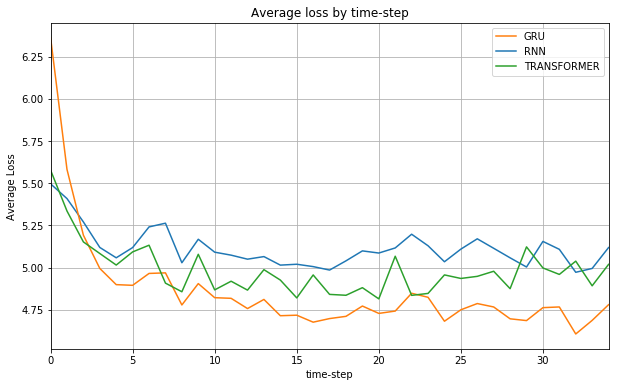

In [6]:
part = '5_1'
fig_path = 'figures/5_1/'


losses = {}
for f in files_Q5_1:
    architecture = f.split('_')[-1].split('.')[0]
    fname = '{}/{}'.format(part, f)
    with open(fname, 'rb') as handle:
        data = (np.load(handle)).tolist()

    losses[architecture] = data

plot_it(losses, fig_path, fig_size = (10,6))
